<a href="https://colab.research.google.com/github/manel98daboussi/GRIP_Task6/blob/main/Task_6_Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP - The Sparks Foundation
## Data Science and Business Analytics 
## Task 6: Prediction using Decision Tree Algorithm
## Author : ***Manel Daboussi***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



### Importing all relevant Libraries

In [4]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets as datasets
from sklearn import tree

# Remove warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



### Reading data from remote link

In [9]:
#importing the dataset
data =pd.read_csv("/content/drive/MyDrive/Iris Data.csv")
data
'Data Imported Successfully'

'Data Imported Successfully'

In [10]:
# removing the column Id because there is no need of it 
data = data.drop(['Id'],axis = 1)
data.head()   # printing head( first few rows) of the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Explore the Data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### The most important information obtained is that there is no null values in the data set.


### Statistical Details

In [12]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



### Visualizing the Data

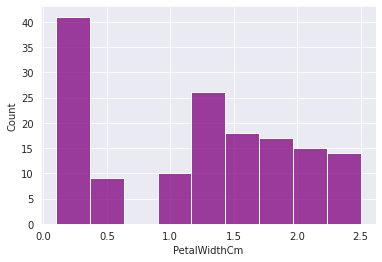

In [16]:
# Graph with background grid
sns.set_style("darkgrid")
#Histogram 
sns.histplot(data['PetalWidthCm'],kde = False,color="Purple",legend="Data Visualization")
plt.show()


### Pairplot

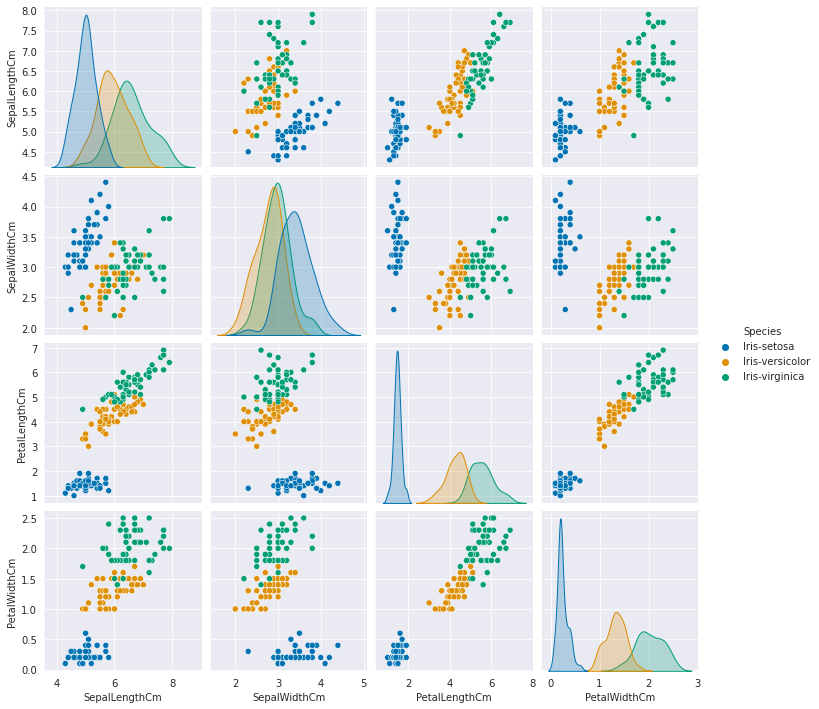

In [17]:
sns.pairplot(data, hue='Species',palette="colorblind",)  # to show relation between columns


### Correlation Function

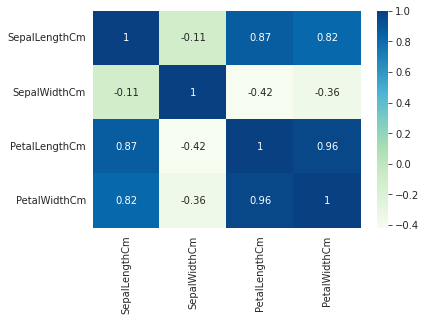

In [44]:
# using Pearson's correlation for quantifying the relationship
corr = data.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap="GnBu",)


### Seperating X (Feature matrix) and y (vector of predictions)

In [26]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y=lab.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Seperating X (Feature matrix) and y (vector of predictions)

### Splitting into training and test set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Applying Decision Tree Classifier on Training Data

In [29]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

### Making Predictions

In [30]:
pred = clf.predict(X_test)
pred

array([2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2,
       2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2])

### Accuracy Check

In [32]:
score = clf.score(X_test, pred)
print("score",score)

score 1.0


In [33]:
# Comparing Actual vs Predicted Values
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df.head()

,Actual,Predicted
0,2,2
1,2,2
2,2,2
3,2,2
4,2,1


In [34]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pred)
print(cm)
accuracy_score(y_test, pred)

[[ 9  0  0]
 [ 0  8  1]
 [ 0  2 18]]


0.9210526315789473

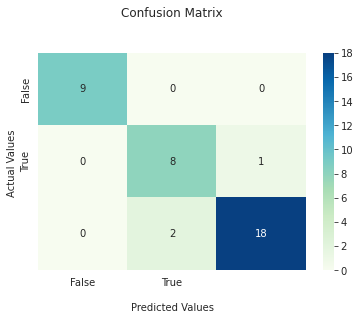

In [45]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='GnBu')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()



### Visualization of Decision Tree

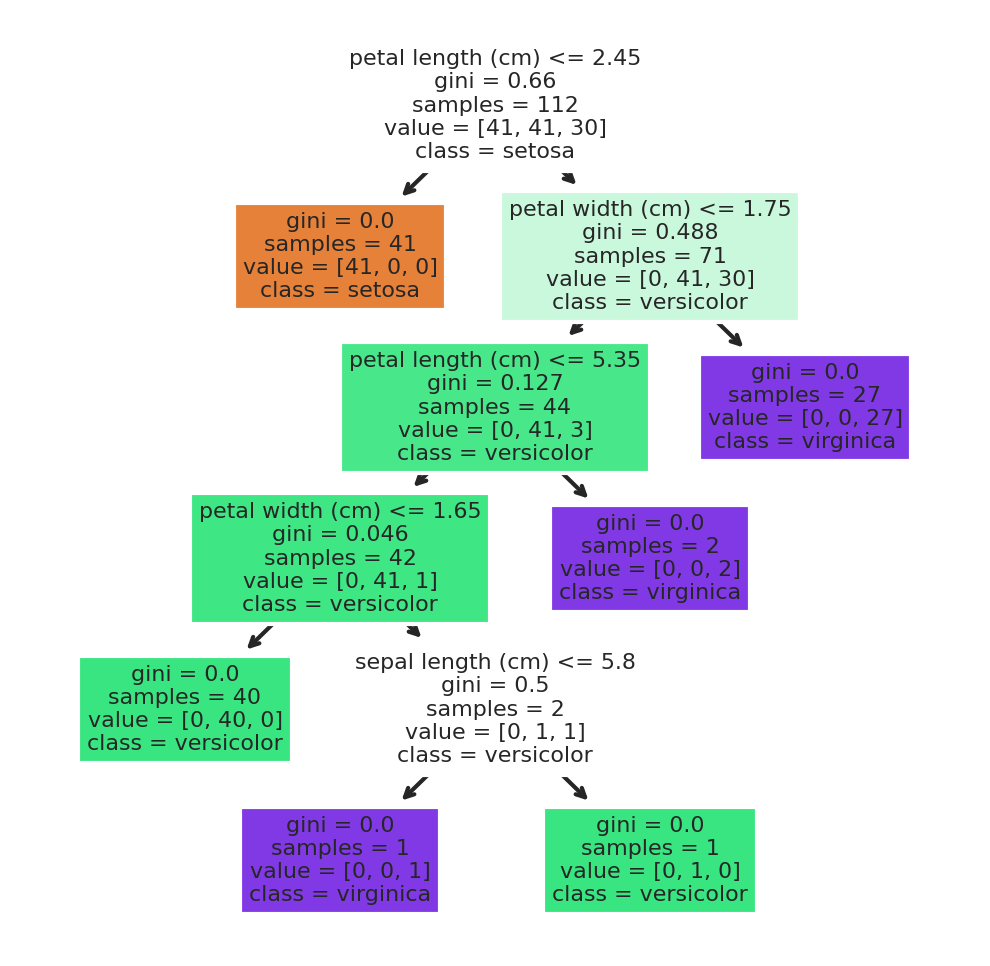

In [46]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True);

## End of Task 6. Thank You!!